In [1]:
%config Completer.use_jedi = False

import sys
sys.path.append("../")
sys.path.append("../../")

from data_processing import hl_features

/Users/lucamasserano/Desktop/uni/cmu/ada/ada_code/hep-lfi/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/Users/lucamasserano/Desktop/uni/cmu/ada/ada_code/hep-lfi/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


## Compute features and write csv

In [4]:
hl_features.muon_features(features=[hl_features.v0, hl_features.v1], 
                          use_files='../use_files.txt',
                          write=True,
                          output_file='../data/v0_v1.csv',
                          threshold=0.1)

Extracting features from muons in each file: 100%|██████████| 330/330 [55:33<00:00, 10.10s/it] 


,true_energy,v0,v1
0,655.699630,1.682727,6.154067
1,136.523152,0.226720,3.221433
2,702.981571,4.752888,9.472453
3,1536.123958,18.286108,15.398491
4,1062.758499,6.805694,9.032339
...,...,...,...
395995,456.569128,0.255201,3.602214
395996,952.326186,0.729934,4.369923
395997,534.429857,9.217948,9.467583
395998,485.516879,0.000000,3.341851


## Scatterplots (see Tommaso's August 2020 paper, figure 5, page 9)

In [71]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

In [7]:
data = pd.read_csv('../data/v0_v1.csv')
data.head()

,true_energy,v0,v1
0,655.699630,1.682727,6.154067
1,136.523152,0.226720,3.221433
2,702.981571,4.752888,9.472453
3,1536.123958,18.286108,15.398491
4,1062.758499,6.805694,9.032339


In [9]:
data.describe()

,true_energy,v0,v1
count,396000.000000,396000.000000,396000.000000
mean,1047.844754,15.292184,10.872413
std,548.294800,60.883258,9.843773
min,100.002662,0.000000,2.431611
25%,573.155083,1.570735,5.569052
50%,1046.421681,4.240970,8.289144
75%,1522.518062,10.579381,12.672437
max,1999.988534,1768.488914,327.210110


#### Estimate point density to build color gradient

In [73]:
xy_v0 = np.vstack([data.true_energy, data.v0])
z = gaussian_kde(xy_v0)(xy_v0)

xy_v1 = np.vstack([data.true_energy, data.v1])
z1 = gaussian_kde(xy_v1)(xy_v1)

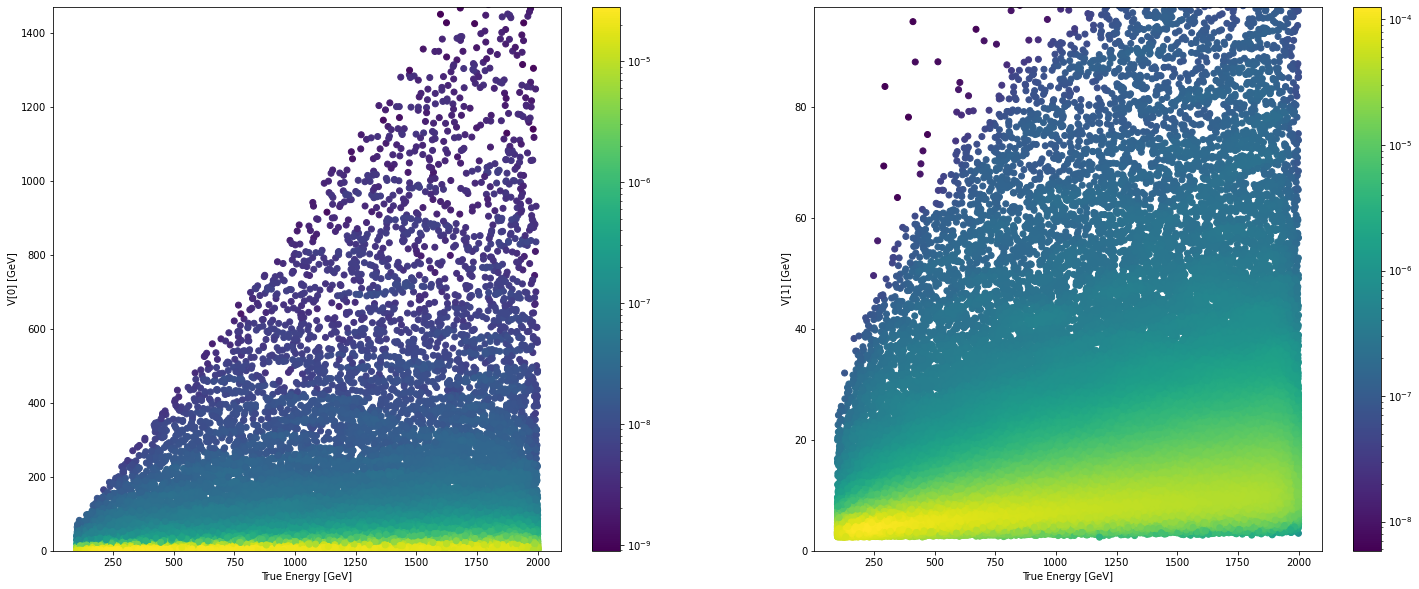

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,10))

v0_plot = ax[0].scatter(x=data.true_energy, y=data.v0, c=z, norm=matplotlib.colors.LogNorm())
ax[0].set(xlabel='True Energy [GeV]', ylabel = 'V[0] [GeV]', ylim=(0, 1470))
fig.colorbar(v0_plot, ax=ax[0])

v1_plot = ax[1].scatter(x=data.true_energy, y=data.v1, c=z1, norm=matplotlib.colors.LogNorm())
ax[1].set(xlabel='True Energy [GeV]', ylabel = 'V[1] [GeV]', ylim=(0, 98))
fig.colorbar(v1_plot, ax=ax[1])